In [107]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.head(5)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


Data preprocessing

In [7]:
#check missing value
df_train.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [9]:
df_train.shape

(10738, 12)

In [14]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [15]:
#total mising value for each columns
df_train.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [17]:
#Dropping all mising value as we have less records with missing values.
df_train = df_train.dropna()

# EDA

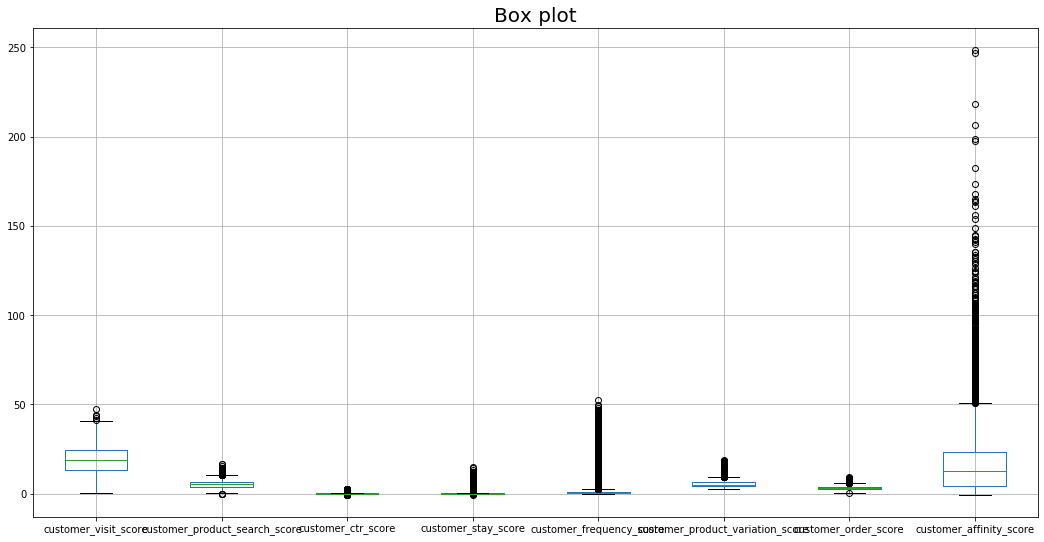

In [18]:
num_cols = ['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score']
plt.figure(figsize=(18,9))
df_train[num_cols].boxplot()
plt.title("Box plot", fontsize=20)
plt.show()

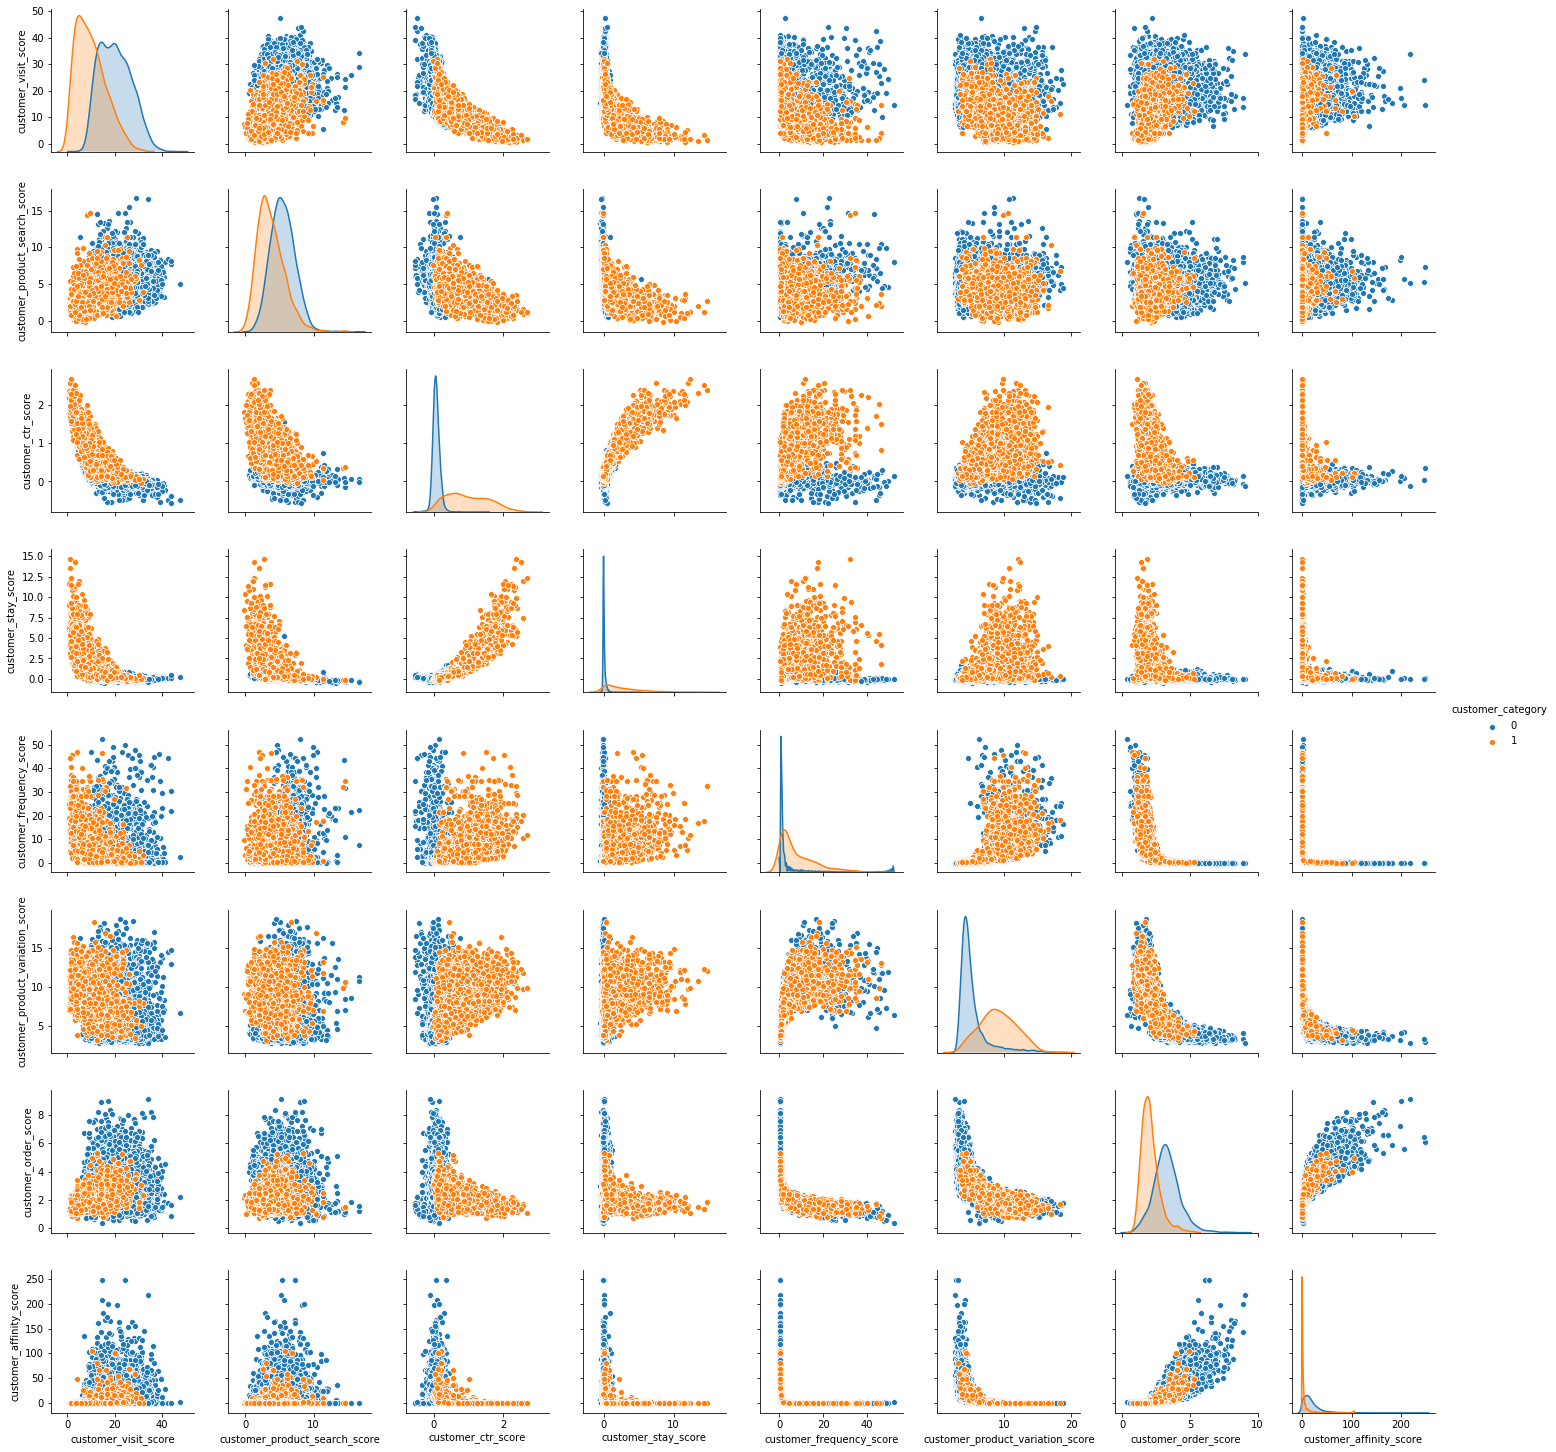

In [117]:
sns.pairplot(df_train, hue='customer_category')
plt.show()

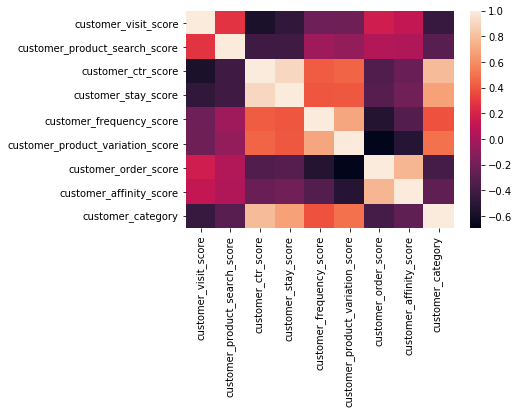

In [115]:
sns.heatmap(df_train.corr())

In [116]:
df_train.corr()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.275355,-0.569854,-0.475129,-0.211943,-0.221562,0.171515,0.118932,-0.449501
customer_product_search_score,0.275355,1.000000,-0.415561,-0.414471,-0.022742,-0.065763,0.049241,0.043319,-0.300151
customer_ctr_score,-0.569854,-0.415561,1.000000,0.909241,0.421412,0.448735,-0.343172,-0.232725,0.793852
customer_stay_score,-0.475129,-0.414471,0.909241,1.000000,0.402413,0.407295,-0.312002,-0.210212,0.678401
customer_frequency_score,-0.211943,-0.022742,0.421412,0.402413,1.000000,0.701687,-0.533257,-0.325495,0.390522
customer_product_variation_score,-0.221562,-0.065763,0.448735,0.407295,0.701687,1.000000,-0.694472,-0.524955,0.493653
customer_order_score,0.171515,0.049241,-0.343172,-0.312002,-0.533257,-0.694472,1.000000,0.764188,-0.385063
customer_affinity_score,0.118932,0.043319,-0.232725,-0.210212,-0.325495,-0.524955,0.764188,1.000000,-0.272859
customer_category,-0.449501,-0.300151,0.793852,0.678401,0.390522,0.493653,-0.385063,-0.272859,1.000000


1. Data is Linearly separable as we can see from pair plot.
2. Customer_ctr_score is higly correlated with customer category
3. customer_afinity_score is having more outlier and also less correlated with cutmer category.We can drop this column from training and test data set to increase model accuracy

In [28]:
#drop customer_id
X = df_train.drop(labels=['customer_id', 'customer_category'], axis=1)
y = df_train[['customer_category']] 

In [29]:
X.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA


In [36]:
#Encoding categorical features using one hot encoder
X = pd.concat([X,pd.get_dummies(X['customer_active_segment'],drop_first=True),
          pd.get_dummies(X['X1'],drop_first=True)],axis=1).drop(['customer_active_segment','X1'], axis=1)

In [37]:
X.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,AA,B,C,D,AA,BA,E,F
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,1,0,0,0,0,1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,1,0,0,0,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,1,0,0,1,0,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,1,0,0,0,0,0,0,1
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,1,0,1,0,0,0


In [38]:
y.head()

,customer_category
0,0
1,0
2,0
3,0
4,0


In [39]:
#Splitting traing and test data to evalualte our model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
lf = LogisticRegression(random_state=0)

In [41]:
lf.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = lf.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1832
           1       0.95      0.80      0.87       267

    accuracy                           0.97      2099
   macro avg       0.96      0.90      0.93      2099
weighted avg       0.97      0.97      0.97      2099



In [89]:
#Import test data
df_test_data = pd.read_csv('test.csv')

In [90]:
df_test = df_test_data.copy()

In [63]:
df_test.shape

(7160, 11)

In [50]:
df_test.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [64]:
#handlig contiuous data missing values
miss_values = {'customer_product_search_score':5.274847, 'customer_stay_score':0.374230,
              'customer_product_variation_score':5.788180, 'customer_order_score':3.150071}
miss_col_list = ['customer_product_search_score','customer_stay_score',
         'customer_product_variation_score','customer_order_score']
df_test[miss_col_list] = df_test[miss_col_list].fillna(value=miss_values)

In [78]:
#handling categorical data missing values
df_test['customer_active_segment']= df_test['customer_active_segment'].fillna(value=df_test['customer_active_segment'].mode()[0])
df_test['X1'] = df_test['X1'].fillna(value= df_test['X1'].mode()[0])

In [80]:
df_test.isnull().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

In [82]:
df_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [83]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['customer_active_segment'],drop_first=True),
          pd.get_dummies(df_test['X1'],drop_first=True)],axis=1).drop(['customer_id','customer_active_segment','X1'], axis=1)

In [84]:
df_test

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,AA,B,C,D,AA,BA,E,F
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0,1,0,0,0,1,0,0
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0,1,0,0,1,0,0,0
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0,1,0,0,1,0,0,0
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0,1,0,0,0,1,0,0
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,0,0,1,0,1,0,0,0
7156,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,0,0,1,0,0,1,0,0
7157,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,0,0,1,0,0,1,0,0
7158,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,0,0,1,0,0,1,0,0


In [87]:
result = lf.predict(df_test)

In [93]:
result_df = pd.DataFrame()
result_df['customer_id'] = df_test_data['customer_id']

In [95]:
result_df['customer_category'] = result

In [103]:
result_df['customer_category'].value_counts()

0    6846
1     314
Name: customer_category, dtype: int64

In [104]:
result_df.to_csv('Results.csv')